![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [2]:
def bissecao_step(f,a,b):
    z = (a+b)/2
    if f(a)*f(z)<0:
        b=z
    else:
        a=z
    return a,b
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do intervalo ficar menor do que  xtol,
    ou quando o valor absoluto da função ficar abaixo de  ytol.
    """
    pts=[]
    while True:
        if abs(f(b)-f(a))<ytol and abs(b-a)<xtol:
            break
        a,b = bissecao_step(f, a, b)
        z=(a+b)/2
        pts.append(z)
    return pts
    

In [3]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do passo é menor do que  xtol,
    quando o valor absoluto da função ficar abaixo de  ytol,
    ou após  maxiter  iterações.
    """
    a=f(x)
    r=1
    i=0
    l=[x]
    while True:
        if x<xtol and f(x)<ytol or i>maxiter:
            break
        dx = f(x)/df(x)
        newx= x-dx
        l.append(newx)
        i+=1
        x=newx
    return l

## Derivadas numéricas

Dê, abaixo, as funções para calcular a primeira e a segunda derivadas numéricas.

In [4]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    return (f(x+h) - f(x-h))/(2*h)
def ddf_central(f,x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

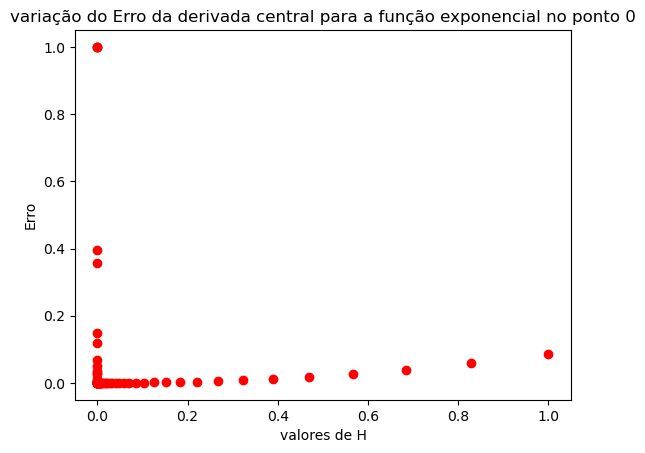

In [5]:
#def f(x):
    #return np.exp(x)
hs = np.logspace(-27,0,base=2, num=100)
erro=ddf_central(np.exp,0,hs)-np.exp(0)
plt.plot(hs,abs(erro),'ro')
plt.title('variação do Erro da derivada central para a função exponencial no ponto 0')
plt.xlabel("valores de H")
plt.ylabel("Erro")
ax = plt.gca()

In [6]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?
- Use erros relativos; e
- faça várias curvas no mesmo gráfico.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


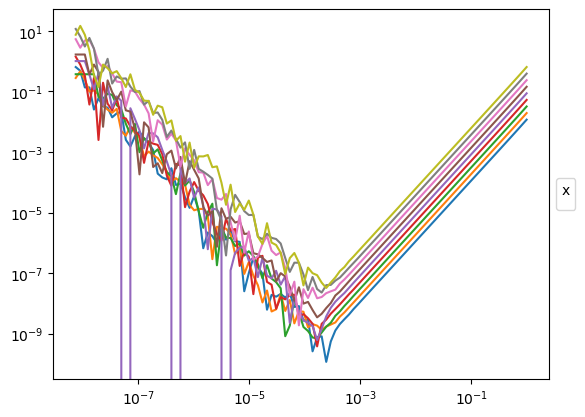

In [7]:
hs = np.logspace(-27,0,base=2, num=100)
erro=ddf_central(np.exp,-2,hs)-np.exp(-2)
erro1=ddf_central(np.exp,-1.5,hs)-np.exp(-1.5)
erro2=ddf_central(np.exp,-1,hs)-np.exp(-1)
erro3=ddf_central(np.exp,-0.5,hs)-np.exp(-0.5)
erro4=ddf_central(np.exp,0,hs)-np.exp(0)
erro5=ddf_central(np.exp,0.5,hs)-np.exp(0.5)
erro6=ddf_central(np.exp,1,hs)-np.exp(1)
erro7=ddf_central(np.exp,1.5,hs)-np.exp(1.5)
erro8=ddf_central(np.exp,2,hs)-np.exp(2)
plt.loglog(hs,abs(erro))
plt.loglog(hs,abs(erro1))
plt.loglog(hs,abs(erro2))
plt.loglog(hs,abs(erro3))
plt.loglog(hs,abs(erro4))
plt.loglog(hs,abs(erro5))
plt.loglog(hs,abs(erro6))
plt.loglog(hs,abs(erro7))
plt.loglog(hs,abs(erro8))
plt.legend(title="x", bbox_to_anchor=(1,0.5), loc="center left")
ax = plt.gca()

In [8]:
assert len(ax.lines) >= 8
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

AssertionError: 

Comente.

YOUR ANSWER HERE

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [ ]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [ ]:
def g1(x):
    return np.exp(x)-2
def g2(x):
    h=1e-3
    return (f(x+h) - f(x-h))/(2*h)
def g3(x):
    h=1e-5
    return (f(x+h) - f(x-h))/(2*h)

In [ ]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

In [ ]:
x=np.linspace(-1,1,20)
y=f(x)
plt.plot(x, y, color='black', linestyle='solid', marker='o', markerfacecolor="red")
plt.title("Gráfico da função $f(x)=e^x-2$")
plt.grid()
ax = plt.gca()

In [ ]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

graficamente percebemos que a raiz da função está entre 0.5 e 0.75. Pois o zero da derivada é no ponto de inflexão da função.

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

In [ ]:
y=[abs(i-np.log(2)) for i in bissecao_pts(g1,0.5,0.75)]
y1=[abs(i-np.log(2)) for i in bissecao_pts(g2,0.5,0.75)]
y2=[abs(i-np.log(2)) for i in bissecao_pts(g3,0.5,0.75)]
plt.plot(y, linestyle='solid', marker='o',markerfacecolor="red")
plt.plot(y1, linestyle='solid', marker='o',markerfacecolor="green")
plt.plot(y2, linestyle='solid', marker='o',markerfacecolor="orange")
plt.xlabel("interações")
plt.ylabel('Distância até $\ln{2}$')
ax = plt.gca()

In [ ]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

YOUR ANSWER HERE

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [ ]:
def h1(x):
    return np.exp(x)
def h2(x):
    return ddf_central(f,x)

In [ ]:
np.random.seed(41)
for x in np.random.randn(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

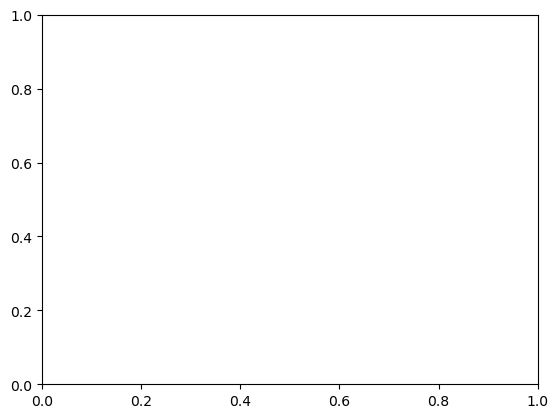

In [11]:
def an1(x):
    return np.exp(x)-2
def an2(x):
    return np.exp(x)
def dnum1(x):
    return df_central(an1,x)
def dnum2(x):
    return ddf_central(an2,x)

y1=abs(newton_pts(an1,an2,0.75)-np.log(2))
#y2=abs(newton_pts(an1,dnum2,0.75)-np.log(2))
#y3=abs(newton_pts(dnum1,dnum2,0.75)-np.log(2))


#plt.plot(y1)
#plt.plot(y2)
#plt.plot(y3)
#y3=newton_pts(df_central(f,xs), ddf_central(f,xs),)
ax = plt.gca()

In [ ]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

YOUR ANSWER HERE

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

In [ ]:
def fx(x):
    return np.exp(x**2-2*x+1)-2**(x**3-6*x+12)
x=np.linspace(-2,2)
y=fx(x)
plt.plot(x,y)
ax = plt.gca()

In [ ]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Defina a derivada (analítica) de f:

In [ ]:
def g1(x):
   

In [ ]:
np.random.seed(2022)
for x in np.random.randn(10):
    assert np.isclose(g1(x), df_central(f, x), rtol=1e-8)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

O que você acha que aconteceu?

YOUR ANSWER HERE

Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

plt.grid()
ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [ ]:
for l in ax.lines:
    ys = l.get_ydata()
    assert min(abs(ys)) < 1e-8